In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sys

In [226]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [227]:
sys.path.append('/content/drive/My Drive/')

In [228]:
data_file1 =  sys.path[-1] + "train.csv"
train = pd.read_csv(data_file1)
train.head()

,ID,Province_State,Date,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,0,Alabama,04-12-2020,3563,93,NaN,3470.0,75.988020,21583.0,437.0,2.610160,460.300152,12.264945
1,1,Alaska,04-12-2020,272,8,66.0,264.0,45.504049,8038.0,31.0,2.941176,1344.711576,11.397059
2,2,Arizona,04-12-2020,3542,115,NaN,3427.0,48.662422,42109.0,NaN,3.246753,578.522286,NaN
3,3,Arkansas,04-12-2020,1280,27,367.0,1253.0,49.439423,19722.0,130.0,2.109375,761.753354,10.156250
4,4,California,04-12-2020,22795,640,NaN,22155.0,58.137726,190328.0,5234.0,2.812020,485.423869,22.961176


In [229]:
train.corr()

,ID,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
ID,1.000000,0.335696,0.171238,0.351684,0.232118,0.647353,0.398072,0.165360,-0.213070,0.830668,-0.371500
Confirmed,0.335696,1.000000,0.763886,0.769516,0.919093,0.626603,0.906105,0.872062,0.134176,0.410056,0.105496
Deaths,0.171238,0.763886,1.000000,0.414893,0.687528,0.536329,0.674389,0.964737,0.492999,0.345898,0.298620
Recovered,0.351684,0.769516,0.414893,1.000000,0.384873,0.471676,0.694943,0.557223,0.076538,0.316798,-0.020390
Active,0.232118,0.919093,0.687528,0.384873,1.000000,0.523298,0.858354,0.804527,0.109076,0.324393,0.117458
Incident_Rate,0.647353,0.626603,0.536329,0.471676,0.523298,1.000000,0.511856,0.553097,0.099195,0.721931,-0.141592
People_Tested,0.398072,0.906105,0.674389,0.694943,0.858354,0.511856,1.000000,0.821799,0.080157,0.497311,0.096117
People_Hospitalized,0.165360,0.872062,0.964737,0.557223,0.804527,0.553097,0.821799,1.000000,0.434983,0.379084,0.325941
Mortality_Rate,-0.213070,0.134176,0.492999,0.076538,0.109076,0.099195,0.080157,0.434983,1.000000,-0.060319,0.636383
Testing_Rate,0.830668,0.410056,0.345898,0.316798,0.324393,0.721931,0.497311,0.379084,-0.060319,1.000000,-0.222234


In [230]:
df = pd.DataFrame(train)

X = df.drop("Confirmed",1)   #Feature Matrix
y = df["Confirmed"]          #Target Variable

df = df.drop(['Deaths', 'ID'], axis=1)
df = df.replace(np.NaN, 0).dropna(axis=1)
corr_matrix = df.corr()
print(corr_matrix)

                      Confirmed  Recovered  ...  Testing_Rate  Hospitalization_Rate
Confirmed              1.000000   0.519947  ...      0.410056             -0.066103
Recovered              0.519947   1.000000  ...      0.317542             -0.164700
Active                 0.919093   0.143422  ...      0.324393             -0.010424
Incident_Rate          0.626603   0.431298  ...      0.721931             -0.128452
People_Tested          0.906105   0.413880  ...      0.497311             -0.112693
People_Hospitalized    0.579971   0.187234  ...      0.246015              0.381740
Mortality_Rate         0.134176   0.052682  ...     -0.060319              0.290391
Testing_Rate           0.410056   0.317542  ...      1.000000             -0.231493
Hospitalization_Rate  -0.066103  -0.164700  ...     -0.231493              1.000000

[9 rows x 9 columns]


In [231]:
#Find features that are more highly correlated for confirmed cases and then deaths 
gb = df.groupby('Province_State')

Alabama = gb.get_group("Alabama")
Alaska = gb.get_group("Alaska")
Arizona = gb.get_group("Arizona")
Arkansas = gb.get_group("Arkansas")
California = gb.get_group("California")
Colorado = gb.get_group("Colorado")
Connecticut = gb.get_group("Connecticut")
Delaware = gb.get_group("Delaware")
Florida = gb.get_group("Florida")
Georgia = gb.get_group("Georgia")
Hawaii = gb.get_group("Hawaii")
Idaho = gb.get_group("Idaho")
Illinois = gb.get_group("Illinois")
Indiana = gb.get_group("Indiana")
Iowa = gb.get_group("Iowa")
Kansas = gb.get_group("Kansas")
Kentucky = gb.get_group("Kentucky")
Louisiana = gb.get_group("Louisiana")
Maine = gb.get_group("Maine")
Maryland = gb.get_group("Maryland")
Massachusetts = gb.get_group("Massachusetts")
Michigan = gb.get_group("Michigan")
Minnesota = gb.get_group("Minnesota")
Mississippi = gb.get_group("Mississippi")
Missouri = gb.get_group("Missouri")
Montana = gb.get_group("Montana")
Nebraska = gb.get_group("Nebraska")
Nevada = gb.get_group("Nevada")
New_Hampshire = gb.get_group("New Hampshire")
New_Jersey = gb.get_group("New Jersey")
New_Mexico = gb.get_group("New Mexico")
New_York = gb.get_group("New York")
North_Carolina = gb.get_group("North Carolina")
North_Dakota = gb.get_group("North Dakota")
Ohio = gb.get_group("Ohio")
Oklahoma = gb.get_group("Oklahoma")
Oregon = gb.get_group("Oregon")
Pennsylvania = gb.get_group("Pennsylvania")
Rhode_Island = gb.get_group("Rhode Island")
South_Carolina = gb.get_group("South Carolina")
South_Dakota = gb.get_group("South Dakota")
Tennessee = gb.get_group("Tennessee")
Texas = gb.get_group("Texas")
Utah = gb.get_group("Utah")
Vermont = gb.get_group("Vermont")
Virginia = gb.get_group("Virginia")
Washington = gb.get_group("Washington")
West_Virginia = gb.get_group("West Virginia")
Wisconsin = gb.get_group("Wisconsin")
Wyoming = gb.get_group("Wyoming")

#Find datasets to add - population and effectiveness of quarantine

In [232]:
list_states = [Alabama, 
Alaska,
Arizona,
Arkansas,
California,
Colorado,
Connecticut,
Delaware,
Florida,
Georgia,
Hawaii,
Idaho,
Illinois,
Indiana,
Iowa,
Kansas,
Kentucky,
Louisiana,
Maine,
Maryland,
Massachusetts,
Michigan,
Minnesota,
Mississippi,
Missouri,
Montana,
Nebraska,
Nevada,
New_Hampshire,
New_Jersey,
New_Mexico,
New_York,
North_Carolina,
North_Dakota,
Ohio,
Oklahoma,
Oregon,
Pennsylvania,
Rhode_Island,
South_Carolina,
South_Dakota,
Tennessee,
Texas,
Utah,
Vermont,
Virginia,
Washington,
West_Virginia,
Wisconsin,
Wyoming]



In [233]:
list_state_names = ["Alabama", 
"Alaska",
"Arizona",
"Arkansas",
"California",
"Colorado",
"Connecticut",
"Delaware",
"Florida",
"Georgia",
"Hawaii",
"Idaho",
"Illinois",
"Indiana",
"Iowa",
"Kansas",
"Kentucky",
"Louisiana",
"Maine",
"Maryland",
"Massachusetts",
"Michigan",
"Minnesota",
"Mississippi",
"Missouri",
"Montana",
"Nebraska",
"Nevada",
"New_Hampshire",
"New_Jersey",
"New_Mexico",
"New_York",
"North_Carolina",
"North_Dakota",
"Ohio",
"Oklahoma",
"Oregon",
"Pennsylvania",
"Rhode_Island",
"South_Carolina",
"South_Dakota",
"Tennessee",
"Texas",
"Utah",
"Vermont",
"Virginia",
"Washington",
"West_Virginia",
"Wisconsin",
"Wyoming"]

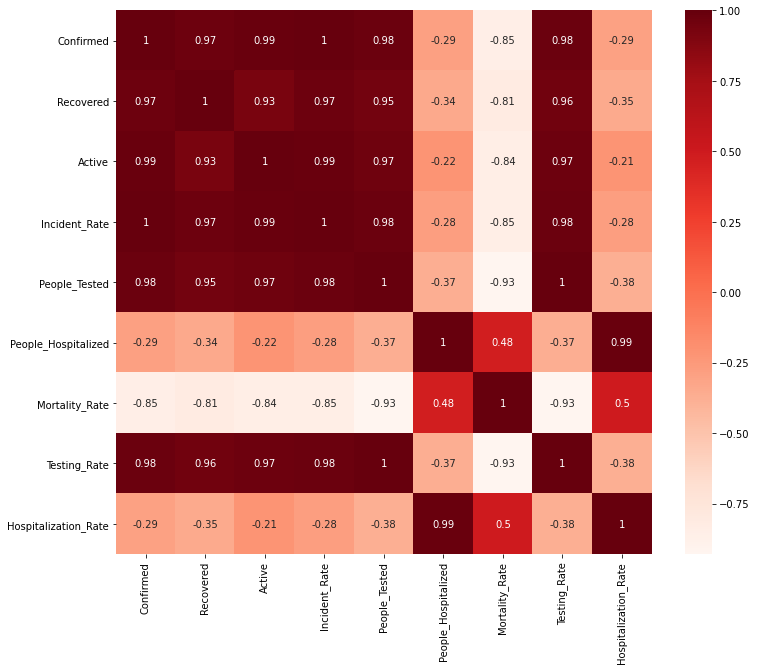

In [234]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
alaska_cor = list_states[1].corr()
sns.heatmap(alaska_cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [235]:
cor_target_alaska = alaska_cor["Confirmed"]
#Selecting highly correlated features
relevant_features = cor_target_alaska[cor_target_alaska>0.75][1:]
print(relevant_features)
#Compare relevant features to each other and remove highly correlated ones/dependant features 

Recovered        0.972091
Active           0.989900
Incident_Rate    0.999819
People_Tested    0.983075
Testing_Rate     0.984496
Name: Confirmed, dtype: float64


In [236]:
iterate_features = cor_target_alaska[cor_target_alaska>0.75][1:]
for feature_i in range(len(iterate_features) - 1):
    for j in range(feature_i+1, len(iterate_features)):
      first_val = str(list(iterate_features.keys())[feature_i])
      second_val = str(list(iterate_features.keys())[j])
      val = corr_matrix[first_val][second_val]
      if val > 0.6:
        relevant_features = relevant_features.drop(str(list(iterate_features.keys())[j]))
print(list(relevant_features.keys()))

['Recovered', 'Active', 'Incident_Rate']


In [237]:
myDict = {} 
for i in range(len(list_states)):
  cor = list_states[i].corr()
  cor_target = cor["Confirmed"]
  relevant_features = cor_target[cor_target>0.75][1:]
  #Among those relevant features, find the correlation among them and pick only one of the features if there is high correlation 
  iterate_features = cor_target[cor_target>0.75][1:]
  for feature_i in range(len(iterate_features) - 1):
    for j in range(feature_i+1, len(iterate_features)):
      first_val = str(list(iterate_features.keys())[feature_i])
      second_val = str(list(iterate_features.keys())[j])
      val = corr_matrix[first_val][second_val]
      if val > 0.75:
        relevant_features = relevant_features.drop(str(list(iterate_features.keys())[j]))
  #Store this resultant relevant_features list 
  myDict[list_state_names[i]] = list(relevant_features.keys())

#Store into a text file 
f = open("/content/drive/My Drive/states_relevant_features.txt","w")
f.write( str(myDict) )
f.close()


In [238]:
f = open("/content/drive/My Drive/states_relevant_features.txt", "r")
print(f.read())

{'Alabama': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Alaska': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Arizona': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Arkansas': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'California': ['Active', 'Incident_Rate', 'Testing_Rate'], 'Colorado': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Connecticut': ['Recovered', 'Active', 'Incident_Rate', 'Mortality_Rate', 'Testing_Rate'], 'Delaware': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Florida': ['Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Georgia': ['Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Hawaii': ['Recovered', 'Active', 'Incident_Rate', 'Testing_Rate'], 'Idaho': ['Recovered', 'Active', 'Incident_Rate', 'People_Hospitalized', 'Testing_Rate'], 'Illinois': ['Active', 'Incident_Rate', 'Testing